# Pandas and jupyter notebook tutorial 

This is a basic tutorial for using a jupyter notebook and the pandas library.
It uses the titanic Kaggle chalange train data set, which is avialble [here](https://www.kaggle.com/c/titanic/data), to be present in the same folder under the name 'train.csv'.

## Jupyter Notebook

This is a jupyter notebook, a useful tool for combing coding with representation.

It contains a few types of cells: 
* Text cells like this one where you use the [markdown](https://en.wikipedia.org/wiki/Markdown) language for formatting text and headers (such as the one above).
* Code cells like the one below, which execute python code in the order you run them.

In [1]:
import numpy as np
print('Numpy version: {}'.format(np.__version__))

Numpy version: 1.14.0


This is especially useful for displaying plots:

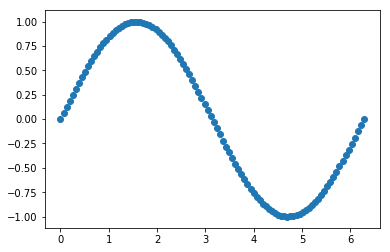

In [2]:
# this line is required for showing the plot
%matplotlib inline

from matplotlib import pyplot as plt
x=2*np.pi*np.linspace(0,1,100)
plt.scatter(x,np.sin(x))

For more details you can refer to many tutorail in the internet such as:
https://plot.ly/python/ipython-notebook-tutorial/

And you can find keyboard shortructs in: https://www.cheatography.com/weidadeyue/cheat-sheets/jupyter-notebook/

## Pandas

In this notebook we will demonstrate some basic functionallity of pandas.

Let's start with importing pandas and reading the data.

In [3]:
import pandas as pd
pd.options.display.max_rows=10
data_relative_path ='train.csv'
df=pd.read_csv(data_relative_path)

Now to look at the data

In [4]:
print('This is a {} type'.format(type(df)))
df

This is a <class 'pandas.core.frame.DataFrame'> type


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
print('Each column is a {} type'.format(type(df['Name'])))
df['Name']

Each column is a <class 'pandas.core.series.Series'> type


0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

Both DataFrame Series object can be created directly, let us demonstrate some simple usage examples:

In [6]:
df=pd.DataFrame([['James',500],['Rachel',800],['Adam',200]],columns=['Name','Salary'],index=['a','b','c'])
df

,Name,Salary
a,James,500
b,Rachel,800
c,Adam,200


In [7]:
ts = pd.Series([5,7,9])
ts

0    5
1    7
2    9
dtype: int64

Filtering and some functionality works similar to numpy:

In [8]:
ts[1]

7

In [9]:
ts[ts>5]

1    7
2    9
dtype: int64

In [10]:
ts.sum()

21

With data frame this gets a bit trickier

In [11]:
df.loc['a','Name']

'James'

In [12]:
df.sum()

Name      JamesRachelAdam
Salary               1500
dtype: object

In [13]:
df[df['Salary']>400]

,Name,Salary
a,James,500
b,Rachel,800


In [14]:
my_filter=lambda x:x[0].lower() in ['a','r']
df[df['Name'].apply(my_filter)]

,Name,Salary
b,Rachel,800
c,Adam,200


We can also look at the index:

In [15]:
list(ts.index)

[0, 1, 2]

In [16]:
df[df['Salary']>400].index

Index(['a', 'b'], dtype='object')

We can add values:

In [17]:
ts[8]=-5
ts

0    5
1    7
2    9
8   -5
dtype: int64

In [18]:
df.loc[4]=['AAAA',np.nan]
df

,Name,Salary
a,James,500.0
b,Rachel,800.0
c,Adam,200.0
4,AAAA,NaN


And we can do a lot more, refer to one of the many tutorials such as:

https://pandas.pydata.org/pandas-docs/stable/10min.html

## Data preparation for processing

Now back to our data, we can do some cleaning and enhancement

In [19]:
df=pd.read_csv(data_relative_path)

First to deal with NULL values

In [20]:
null_age_index=df['Age'].isnull()
df[null_age_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


Let us set a default age so we can use this column

In [21]:
df['Age']=df['Age'].fillna(40)
df[null_age_index]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,40.0,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,40.0,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,40.0,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,40.0,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,40.0,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,40.0,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,40.0,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,40.0,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,40.0,0,0,349217,7.8958,NaN,S


Now let us change the sex column to an integer column

In [22]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,40.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


We can also add columns, let's add another column for discerete fare class

In [23]:
df['Fare class']=(df['Fare']/20).astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare class
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,40.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C,1


Let's get our Y first, but taking the values from the Series object, which is the 'Survived' column in the data frame

In [24]:
Y=df['Survived'].values
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

Now let's turn our data into a X matrix

In [25]:
X=df.as_matrix()
X

array([[1, 0, 3, ..., nan, 'S', 0],
       [2, 1, 1, ..., 'C85', 'C', 3],
       [3, 1, 3, ..., nan, 'S', 0],
       ...,
       [889, 0, 3, ..., nan, 'S', 1],
       [890, 1, 1, ..., 'C148', 'C', 1],
       [891, 0, 3, ..., nan, 'Q', 0]], dtype=object)

This is not what we want, since the array type is object. Let's try to filter on some numeric columns:

In [26]:
X=df[['Sex','Age','Fare']].as_matrix()
print('Array type: {}'.format(X.dtype))
X

Array type: float64


array([[ 0.    , 22.    ,  7.25  ],
       [ 1.    , 38.    , 71.2833],
       [ 1.    , 26.    ,  7.925 ],
       ...,
       [ 1.    , 40.    , 23.45  ],
       [ 0.    , 26.    , 30.    ],
       [ 0.    , 32.    ,  7.75  ]])

# More processing

Get table info:

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Fare class     891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


Value count:

In [28]:
df.Pclass.value_counts() # + another way to use a column name

3    491
1    216
2    184
Name: Pclass, dtype: int64

Distinct values

In [29]:
df.Parch.unique() # or set(df.Parch)

array([0, 1, 2, 5, 3, 4, 6])

Grouping, and applying some agregate function. E.g. average fare per fair class:

In [30]:
pass_count=df.groupby(by='Fare class')['PassengerId'].count()
df.groupby(by='Fare class')['Fare'].sum()/pass_count

Fare class
0       9.727127
1      28.108479
2      51.908569
3      72.988861
4      86.499635
         ...    
10    211.378125
11    226.375840
12    247.520800
13    262.791667
25    512.329200
Length: 14, dtype: float64

Sorting  (order and direction):

In [31]:
df.sort_values(by=['Age','Fare'],ascending=[True,False])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare class
803,804,1,3,"Thomas, Master. Assad Alexander",0,0.42,0,1,2625,8.5167,NaN,C,0
755,756,1,2,"Hamalainen, Master. Viljo",0,0.67,1,1,250649,14.5000,NaN,S,0
469,470,1,3,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,NaN,C,0
644,645,1,3,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,NaN,C,0
78,79,1,2,"Caldwell, Master. Alden Gates",0,0.83,0,2,248738,29.0000,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,"Connors, Mr. Patrick",0,70.50,0,0,370369,7.7500,NaN,Q,0
493,494,0,1,"Artagaveytia, Mr. Ramon",0,71.00,0,0,PC 17609,49.5042,NaN,C,2
96,97,0,1,"Goldschmidt, Mr. George B",0,71.00,0,0,PC 17754,34.6542,A5,C,1
851,852,0,3,"Svensson, Mr. Johan",0,74.00,0,0,347060,7.7750,NaN,S,0


Filtering on more complicate conditions

In [32]:
df[((df.Age>60) | (df.Age<20)) & (df.Sex==1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare class
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S,0
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S,0
22,23,1,3,"McGowan, Miss. Anna ""Annie""",1,15.0,0,0,330923,8.0292,NaN,Q,0
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,853,0,3,"Boulos, Miss. Nourelain",1,9.0,1,1,2678,15.2458,NaN,C,0
853,854,1,1,"Lines, Miss. Mary Conover",1,16.0,0,1,PC 17592,39.4000,D28,S,1
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",1,18.0,0,1,392091,9.3500,NaN,S,0
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15.0,0,0,2667,7.2250,NaN,C,0


Concatination, vertical and horizontal (note the index):

In [33]:
df1=pd.DataFrame([['James',500],['Rachel',800],['Adam',200]],columns=['Name','Salary'],index=['a','b','c'])
df2=pd.DataFrame([['James',True],['Jessica',False],['Karen',False]],columns=['Name','Is male'],index=['a','b','g'])
pd.concat([df1,df2])

,Is male,Name,Salary
a,NaN,James,500.0
b,NaN,Rachel,800.0
c,NaN,Adam,200.0
a,True,James,NaN
b,False,Jessica,NaN
g,False,Karen,NaN


In [34]:
pd.concat([df1,df2],axis=1)

,Name,Salary,Name,Is male
a,James,500.0,James,True
b,Rachel,800.0,Jessica,False
c,Adam,200.0,NaN,NaN
g,NaN,NaN,Karen,False


Merge (database "Join") between df and a new DataFrame we create, class_data. We need to specify which column is matched (in this case it's the index for the right table). Also note how the types of join in the 'how' change the results (left will have all the values for the left table, right is the same for the right table, inner will only keep values which exists in both tables). For more details: 
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html

In [35]:
class_data=pd.DataFrame([['Platinum',True],['Gold',True],['Bronze',False]],index=[1,2,4],columns=['Class Name','Free Food'])
pd.merge(df,class_data,left_on='Pclass',right_index=True,how='left')[['Name','Pclass','Class Name','Free Food']]

,Name,Pclass,Class Name,Free Food
0,"Braund, Mr. Owen Harris",3,NaN,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Platinum,True
2,"Heikkinen, Miss. Laina",3,NaN,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Platinum,True
4,"Allen, Mr. William Henry",3,NaN,NaN
...,...,...,...,...
886,"Montvila, Rev. Juozas",2,Gold,True
887,"Graham, Miss. Margaret Edith",1,Platinum,True
888,"Johnston, Miss. Catherine Helen ""Carrie""",3,NaN,NaN
889,"Behr, Mr. Karl Howell",1,Platinum,True


In [36]:
pd.merge(df,class_data,left_on='Pclass',right_index=True,how='right')[['Name','Pclass','Class Name','Free Food']]

,Name,Pclass,Class Name,Free Food
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Platinum,True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Platinum,True
6,"McCarthy, Mr. Timothy J",1,Platinum,True
11,"Bonnell, Miss. Elizabeth",1,Platinum,True
23,"Sloper, Mr. William Thompson",1,Platinum,True
...,...,...,...,...
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,Gold,True
880,"Shelley, Mrs. William (Imanita Parrish Hall)",2,Gold,True
883,"Banfield, Mr. Frederick James",2,Gold,True
886,"Montvila, Rev. Juozas",2,Gold,True


In [37]:
pd.merge(df,class_data,left_on='Pclass',right_index=True,how='inner')[['Name','Pclass','Class Name','Free Food']]

,Name,Pclass,Class Name,Free Food
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,Platinum,True
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,Platinum,True
6,"McCarthy, Mr. Timothy J",1,Platinum,True
11,"Bonnell, Miss. Elizabeth",1,Platinum,True
23,"Sloper, Mr. William Thompson",1,Platinum,True
...,...,...,...,...
866,"Duran y More, Miss. Asuncion",2,Gold,True
874,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,Gold,True
880,"Shelley, Mrs. William (Imanita Parrish Hall)",2,Gold,True
883,"Banfield, Mr. Frederick James",2,Gold,True
